## Meteorology analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

#### Analyzed data will be used to predict the Sud region's consumption

Licence : [Apache License 2.0]

Data provided by [OpenDataSoft] and [Météo France]

Source file link (csv) : https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/download/?format=csv&refine.nom_reg=Provence-Alpes-C%C3%B4te+d%27Azur&timezone=Europe/Berlin&use_labels_for_header=true&csv_separator=%3B

[OpenDataSoft]: https://public.opendatasoft.com/
[Météo France]: https://donneespubliques.meteofrance.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [227]:
# TODO: add inhabitants number to datasets
#%run MyOtherNotebook.ipynb
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt

%matplotlib inline

In [228]:
# TODO: read https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/api/
# downloading data for the SUD region
# data_link = "https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/download/?format=csv&refine.nom_reg=Provence-Alpes-C%C3%B4te+d%27Azur&timezone=Europe/Berlin&use_labels_for_header=true&csv_separator=%3B"
data_link = "../Datasets/meteorologie/donnees-synop-essentielles-omm-paca.csv"
data_meteo = pd.read_csv(data_link, delimiter=';', encoding='utf_8', parse_dates=True)
print(data_meteo.shape)
data_meteo.head()

(115233, 81)


,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Longitude,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code)
0,7650,2015-06-08T14:00:00+02:00,101500.0,-110.0,8.0,250.0,3.8,303.15,287.25,38.0,...,5.216000,43.437667,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93
1,7591,2015-06-13T11:00:00+02:00,NaN,-90.0,8.0,50.0,3.4,293.35,282.25,49.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
2,7591,2015-06-13T14:00:00+02:00,NaN,-100.0,8.0,200.0,4.0,297.45,284.45,44.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
3,7591,2015-06-06T23:00:00+02:00,NaN,10.0,0.0,20.0,3.0,289.45,283.95,70.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
4,7591,2015-06-09T17:00:00+02:00,NaN,20.0,3.0,280.0,8.6,294.15,281.05,43.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93


In [229]:
# removing useless columns
# TODO: add EPCI (or department) when inhabitants number will be added
# removing columns with too much NaN values
acceptablePercentage = 40

def removeNaN(threshold, data):
    numRows, numColumns = data.shape
    nan_stats = data.isna().sum()
    for col_name, value in nan_stats.items():
        # if more than the acceptable percentage of the values are NaN
        if value*100/numRows >= acceptablePercentage:
            data = data.drop(columns=[col_name])
    return data

data_meteo = removeNaN(acceptablePercentage, data_meteo)
data_meteo

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Longitude,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code)
0,7650,2015-06-08T14:00:00+02:00,101500.0,-110.0,8.0,250.0,3.8,303.15,287.25,38.0,...,5.216000,43.437667,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93
1,7591,2015-06-13T11:00:00+02:00,NaN,-90.0,8.0,50.0,3.4,293.35,282.25,49.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
2,7591,2015-06-13T14:00:00+02:00,NaN,-100.0,8.0,200.0,4.0,297.45,284.45,44.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
3,7591,2015-06-06T23:00:00+02:00,NaN,10.0,0.0,20.0,3.0,289.45,283.95,70.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
4,7591,2015-06-09T17:00:00+02:00,NaN,20.0,3.0,280.0,8.6,294.15,281.05,43.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
5,7650,2015-06-11T23:00:00+02:00,101190.0,70.0,3.0,80.0,4.1,299.25,283.45,37.0,...,5.216000,43.437667,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93
6,7591,2015-06-05T14:00:00+02:00,NaN,-100.0,7.0,180.0,2.5,300.05,284.55,38.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
7,7591,2015-06-16T20:00:00+02:00,NaN,80.0,0.0,20.0,4.6,286.05,284.75,92.0,...,6.502333,44.565667,Embrun,5046,CC Serre-Ponçon,200067742,Hautes-Alpes,5,Provence-Alpes-Côte d'Azur,93
8,7650,2015-06-16T23:00:00+02:00,101510.0,90.0,3.0,310.0,7.0,293.35,289.15,77.0,...,5.216000,43.437667,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93
9,7650,2015-06-18T02:00:00+02:00,101650.0,20.0,1.0,310.0,4.5,293.75,282.95,50.0,...,5.216000,43.437667,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93


In [230]:
# removing cities' and other useless caracteristics
# TODO: define criterias for remove selection
toRemove = [
    'Coordonnees', 'Nom', 'Longitude', 'Latitude', 'communes (name)', 
    'communes (code)', 'EPCI (name)', 'EPCI (code)', 'department (name)', 
    'department (code)', 'region (name)', 'region (code)',
    'Temps passé 1.1', 'Temps présent.1', 'Altitude', 
    'ID OMM station', 'Visibilité horizontale',
    'Température'
]
# we delete the Temperature column because we want the values in Celcius (not in Kelvin) 
# corresponding of the Température (°C) column
data_meteo = data_meteo.drop(columns=toRemove, errors='ignore') # ignore errors due to previous deletions
data_meteo

,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Temps présent,Pression station,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Type de tendance barométrique.1,Température (°C)
0,2015-06-08T14:00:00+02:00,101500.0,-110.0,8.0,250.0,3.8,287.25,38.0,NaN,101140.0,NaN,NaN,0.0,0.0,0.0,0.0,8.0,30.0
1,2015-06-13T11:00:00+02:00,NaN,-90.0,8.0,50.0,3.4,282.25,49.0,0.0,91480.0,7.9,-10.0,0.0,0.0,0.2,9.1,8.0,20.2
2,2015-06-13T14:00:00+02:00,NaN,-100.0,8.0,200.0,4.0,284.45,44.0,0.0,91380.0,7.2,-10.0,0.0,0.0,0.0,0.2,8.0,24.3
3,2015-06-06T23:00:00+02:00,NaN,10.0,0.0,20.0,3.0,283.95,70.0,0.0,92480.0,4.8,-10.0,0.0,0.0,-0.1,-0.1,0.0,16.3
4,2015-06-09T17:00:00+02:00,NaN,20.0,3.0,280.0,8.6,281.05,43.0,0.0,91530.0,16.1,-10.0,0.0,0.0,0.0,0.0,3.0,21.0
5,2015-06-11T23:00:00+02:00,101190.0,70.0,3.0,80.0,4.1,283.45,37.0,NaN,100820.0,NaN,NaN,0.0,0.0,0.0,0.0,3.0,26.1
6,2015-06-05T14:00:00+02:00,NaN,-100.0,7.0,180.0,2.5,284.55,38.0,0.0,92180.0,6.4,-10.0,0.0,0.0,0.0,0.0,7.0,26.9
7,2015-06-16T20:00:00+02:00,NaN,80.0,0.0,20.0,4.6,284.75,92.0,61.0,91690.0,7.0,-10.0,0.6,4.4,4.6,4.6,0.0,12.9
8,2015-06-16T23:00:00+02:00,101510.0,90.0,3.0,310.0,7.0,289.15,77.0,NaN,101140.0,NaN,NaN,0.0,0.0,19.4,29.0,3.0,20.2
9,2015-06-18T02:00:00+02:00,101650.0,20.0,1.0,310.0,4.5,282.95,50.0,NaN,101270.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,20.6


In [231]:
# sort data by date (increasing order)
data_meteo = data_meteo.sort_values(by='Date')
data_meteo.dtypes

Date                                            object
Pression au niveau mer                         float64
Variation de pression en 3 heures              float64
Type de tendance barométrique                  float64
Direction du vent moyen 10 mn                  float64
Vitesse du vent moyen 10 mn                    float64
Point de rosée                                 float64
Humidité                                       float64
Temps présent                                  float64
Pression station                               float64
Rafales sur une période                        float64
Periode de mesure de la rafale                 float64
Précipitations dans la dernière heure          float64
Précipitations dans les 3 dernières heures     float64
Précipitations dans les 6 dernières heures     float64
Précipitations dans les 12 dernières heures    float64
Type de tendance barométrique.1                float64
Température (°C)                               float64
dtype: obj

In [232]:
# group rows by Date and applying the mean operation
data_meteo = data_meteo.groupby(['Date'], as_index=False).agg(np.mean)
#data = data.groupby(['Date']).agg(np.mean)
#data = data.loc['2019-12-01':]
print(data_meteo.shape)
data_meteo

(29003, 18)


,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Temps présent,Pression station,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Type de tendance barométrique.1,Température (°C)
0,2010-01-01T01:00:00+01:00,99103.333333,-147.500000,7.750000,192.500000,2.800000,280.875000,89.000000,6.000000,96062.500000,6.550000,-10.0,0.200000,0.200000,0.250000,NaN,7.750000,9.475000
1,2010-01-01T04:00:00+01:00,98823.333333,-282.500000,7.000000,222.500000,5.675000,280.200000,87.750000,31.666667,95780.000000,8.325000,-10.0,0.200000,0.250000,NaN,NaN,7.000000,8.950000
2,2010-01-01T07:00:00+01:00,98866.666667,-90.000000,6.333333,165.000000,7.825000,278.525000,85.750000,21.000000,95772.500000,11.300000,-10.0,0.000000,0.800000,NaN,1.333333,6.333333,7.625000
3,2010-01-01T10:00:00+01:00,99106.666667,232.500000,2.000000,177.500000,5.550000,278.550000,86.250000,45.000000,96005.000000,9.900000,-10.0,0.350000,0.850000,NaN,NaN,2.000000,7.600000
4,2010-01-01T13:00:00+01:00,99226.666667,107.500000,1.000000,257.500000,8.350000,278.750000,82.000000,35.250000,96112.500000,12.475000,-10.0,0.100000,0.400000,1.250000,NaN,1.000000,8.525000
5,2010-01-01T16:00:00+01:00,99450.000000,240.000000,3.000000,197.500000,5.525000,278.600000,79.750000,5.750000,96352.500000,9.375000,-10.0,0.000000,0.200000,NaN,NaN,3.000000,8.775000
6,2010-01-01T19:00:00+01:00,99736.666667,287.500000,1.500000,277.500000,7.325000,277.950000,81.000000,1.333333,96640.000000,11.175000,-10.0,0.000000,0.000000,NaN,1.400000,1.500000,7.875000
7,2010-01-01T22:00:00+01:00,100103.333333,355.000000,3.000000,237.500000,6.425000,276.700000,83.500000,1.500000,96995.000000,10.425000,-10.0,0.000000,0.000000,NaN,NaN,3.000000,6.200000
8,2010-01-02T01:00:00+01:00,100336.666667,240.000000,1.500000,240.000000,6.925000,273.950000,74.000000,1.333333,97235.000000,10.950000,-10.0,0.000000,0.000000,0.000000,NaN,1.500000,5.100000
9,2010-01-02T04:00:00+01:00,100663.333333,295.000000,3.000000,317.500000,6.525000,271.300000,66.500000,1.000000,97530.000000,11.175000,-10.0,0.000000,0.000000,NaN,NaN,3.000000,3.900000


In [233]:
# adding custom dates columns
# to match the consumption dataset
data_meteo.insert(loc=1, column='Date - Heure', value=pd.to_datetime(data_meteo['Date']))
data_meteo['Date'] = pd.to_datetime(data_meteo['Date - Heure'], format='%Y-%m-%dT%H:%M:%S', utc=True).dt.date
data_meteo.insert(loc=1, column='Heure', value=pd.to_datetime(data_meteo['Date - Heure'], format='%Y-%m-%dT%H:%M:%S', utc=True).dt.time)
data_meteo

,Date,Heure,Date - Heure,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Temps présent,Pression station,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Type de tendance barométrique.1,Température (°C)
0,2010-01-01,00:00:00,2010-01-01 01:00:00+01:00,99103.333333,-147.500000,7.750000,192.500000,2.800000,280.875000,89.000000,6.000000,96062.500000,6.550000,-10.0,0.200000,0.200000,0.250000,NaN,7.750000,9.475000
1,2010-01-01,03:00:00,2010-01-01 04:00:00+01:00,98823.333333,-282.500000,7.000000,222.500000,5.675000,280.200000,87.750000,31.666667,95780.000000,8.325000,-10.0,0.200000,0.250000,NaN,NaN,7.000000,8.950000
2,2010-01-01,06:00:00,2010-01-01 07:00:00+01:00,98866.666667,-90.000000,6.333333,165.000000,7.825000,278.525000,85.750000,21.000000,95772.500000,11.300000,-10.0,0.000000,0.800000,NaN,1.333333,6.333333,7.625000
3,2010-01-01,09:00:00,2010-01-01 10:00:00+01:00,99106.666667,232.500000,2.000000,177.500000,5.550000,278.550000,86.250000,45.000000,96005.000000,9.900000,-10.0,0.350000,0.850000,NaN,NaN,2.000000,7.600000
4,2010-01-01,12:00:00,2010-01-01 13:00:00+01:00,99226.666667,107.500000,1.000000,257.500000,8.350000,278.750000,82.000000,35.250000,96112.500000,12.475000,-10.0,0.100000,0.400000,1.250000,NaN,1.000000,8.525000
5,2010-01-01,15:00:00,2010-01-01 16:00:00+01:00,99450.000000,240.000000,3.000000,197.500000,5.525000,278.600000,79.750000,5.750000,96352.500000,9.375000,-10.0,0.000000,0.200000,NaN,NaN,3.000000,8.775000
6,2010-01-01,18:00:00,2010-01-01 19:00:00+01:00,99736.666667,287.500000,1.500000,277.500000,7.325000,277.950000,81.000000,1.333333,96640.000000,11.175000,-10.0,0.000000,0.000000,NaN,1.400000,1.500000,7.875000
7,2010-01-01,21:00:00,2010-01-01 22:00:00+01:00,100103.333333,355.000000,3.000000,237.500000,6.425000,276.700000,83.500000,1.500000,96995.000000,10.425000,-10.0,0.000000,0.000000,NaN,NaN,3.000000,6.200000
8,2010-01-02,00:00:00,2010-01-02 01:00:00+01:00,100336.666667,240.000000,1.500000,240.000000,6.925000,273.950000,74.000000,1.333333,97235.000000,10.950000,-10.0,0.000000,0.000000,0.000000,NaN,1.500000,5.100000
9,2010-01-02,03:00:00,2010-01-02 04:00:00+01:00,100663.333333,295.000000,3.000000,317.500000,6.525000,271.300000,66.500000,1.000000,97530.000000,11.175000,-10.0,0.000000,0.000000,NaN,NaN,3.000000,3.900000


In [234]:
# specific day values
#today = date.today().strftime("%Y-%m-%d")
target_date = datetime.strptime("2020-02-02", "%Y-%m-%d").date()
target_date_data = data_meteo.loc[data_meteo['Date'] == target_date]
target_date_data

,Date,Heure,Date - Heure,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Temps présent,Pression station,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Type de tendance barométrique.1,Température (°C)
28995,2020-02-02,00:00:00,2020-02-02 01:00:00+01:00,102056.666667,30.0,5.00,297.5,4.700,280.150,89.00,0.666667,98960.0,7.825,-10.0,0.000000,0.000000,0.000000,0.833333,5.00,8.800
28996,2020-02-02,03:00:00,2020-02-02 04:00:00+01:00,102060.000000,2.5,4.00,195.0,5.200,278.350,87.50,15.666667,98962.5,7.675,-10.0,0.000000,0.000000,0.000000,0.066667,4.00,7.300
28997,2020-02-02,06:00:00,2020-02-02 07:00:00+01:00,102176.666667,125.0,3.00,182.5,4.300,278.275,86.50,0.666667,99087.5,7.925,-10.0,0.000000,0.000000,0.000000,0.000000,3.00,7.350
28998,2020-02-02,09:00:00,2020-02-02 10:00:00+01:00,102306.666667,122.5,1.75,172.5,4.200,279.600,80.00,1.500000,99210.0,8.475,-10.0,0.000000,0.000000,0.000000,0.000000,1.75,9.875
28999,2020-02-02,12:00:00,2020-02-02 13:00:00+01:00,102210.000000,-80.0,8.00,107.5,4.150,282.225,75.00,1.000000,99130.0,7.725,-10.0,-0.033333,-0.033333,-0.033333,-0.033333,8.00,13.400
29000,2020-02-02,15:00:00,2020-02-02 16:00:00+01:00,102090.000000,-105.0,5.75,187.5,5.650,283.450,75.75,16.500000,99025.0,8.600,-10.0,-0.033333,-0.033333,-0.033333,-0.033333,5.75,14.575
29001,2020-02-02,18:00:00,2020-02-02 19:00:00+01:00,102183.333333,87.5,2.75,177.5,5.900,282.875,81.00,0.500000,99112.5,10.600,-10.0,0.000000,-0.033333,-0.033333,-0.033333,2.75,12.925
29002,2020-02-02,21:00:00,2020-02-02 22:00:00+01:00,102260.000000,95.0,1.75,212.5,5.225,282.500,83.00,0.666667,99207.5,8.675,-10.0,0.000000,-0.033333,-0.033333,-0.033333,1.75,12.250


In [235]:
# average values for the given day
target_date_data.agg(np.mean)

Pression au niveau mer                         102167.916667
Variation de pression en 3 heures                  34.687500
Type de tendance barométrique                       4.000000
Direction du vent moyen 10 mn                     191.562500
Vitesse du vent moyen 10 mn                         4.915625
Point de rosée                                    280.928125
Humidité                                           82.218750
Temps présent                                       4.645833
Pression station                                99086.875000
Rafales sur une période                             8.437500
Periode de mesure de la rafale                    -10.000000
Précipitations dans la dernière heure              -0.008333
Précipitations dans les 3 dernières heures         -0.016667
Précipitations dans les 6 dernières heures         -0.016667
Précipitations dans les 12 dernières heures         0.095833
Type de tendance barométrique.1                     4.000000
Température (°C)        

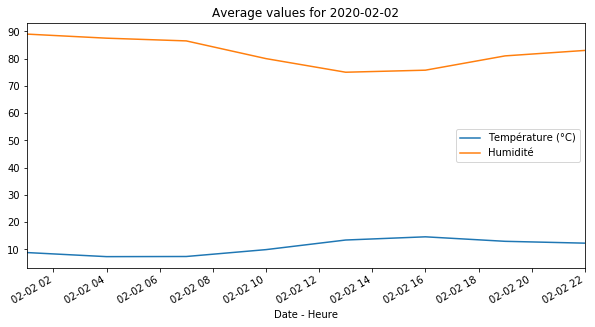

In [236]:
target_date_data[["Date - Heure", "Température (°C)", "Humidité"]].plot(x="Date - Heure", title="Average values for "+str(target_date), figsize=(10,5))

In [237]:
# adding a year column to get average values per year
data_meteo.insert(loc=1, column='Annee', value=pd.to_datetime(data_meteo['Date'], format='%Y-%m-%d', utc=True).dt.year)
data_meteo.groupby(['Annee']).agg(np.mean)

,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Point de rosée,Humidité,Temps présent,Pression station,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Type de tendance barométrique.1,Température (°C)
Annee,,,,,,,,,,,,,,,,,
2010,101230.958904,0.865297,4.318179,200.654395,4.560465,280.195799,67.281878,6.188670,98162.156963,7.682349,-10.0,0.084623,0.252900,0.492877,1.016301,4.318179,13.546076
2011,101696.282534,0.072546,4.315274,190.603596,4.264638,280.946737,64.777911,4.690788,98620.210959,7.261764,-10.0,0.068927,0.213079,0.446356,0.844543,4.315274,15.052898
2012,101538.320241,0.124374,4.324767,191.243739,4.372726,280.186851,63.372154,4.907332,98495.236794,7.510918,-10.0,0.076967,0.218619,0.427072,0.872222,4.324767,14.636601
2013,101411.288813,0.096747,4.313898,192.754852,4.441878,280.460223,66.124914,5.633562,98352.971461,7.623978,-10.0,0.086213,0.262643,0.512763,1.055000,4.313898,14.093088
2014,101404.291667,0.384703,4.304481,189.808505,4.382146,281.557226,66.782392,5.526379,98370.614726,7.444735,-10.0,0.110254,0.312149,0.600211,1.221503,4.304481,15.197694
2015,101755.015341,-0.154946,4.342385,190.683910,4.208760,280.552663,64.890341,3.516062,98730.107695,7.682203,-10.0,0.051157,0.178265,0.359696,0.720981,4.342385,14.627142
2016,101597.488608,0.135281,4.333390,194.894053,4.296392,280.825231,64.991598,4.373718,98464.434951,7.395235,-10.0,0.058994,0.182274,0.365440,0.722305,4.333390,14.836233
2017,101685.686813,-0.540865,4.336996,194.688072,4.290156,280.050486,61.874514,3.256696,98639.573317,7.453969,-10.0,0.047165,0.143092,0.288610,0.582195,4.336996,14.941366
2018,101428.207263,0.539872,4.327000,181.989987,4.204533,281.905942,68.125287,4.996622,98428.301363,7.535752,-10.0,0.097572,0.297566,0.600187,1.215092,4.327000,15.160954


      Température (°C)                  
                  mean      amin    amax
Annee                                   
2010         13.546076 -4.166667  30.775
2011         15.052898 -2.100000  32.300
2012         14.636601 -5.900000  32.475
2013         14.093088 -2.425000  31.575
2014         15.197694 -0.400000  30.775
2015         14.627142  0.200000  32.125
2016         14.836233 -0.025000  30.200
2017         14.941366 -1.475000  33.675
2018         15.160954 -4.566667  32.725
2019         15.247263 -1.175000  34.625
2020          8.403190  1.825000  15.100


KeyError: 'Annee'

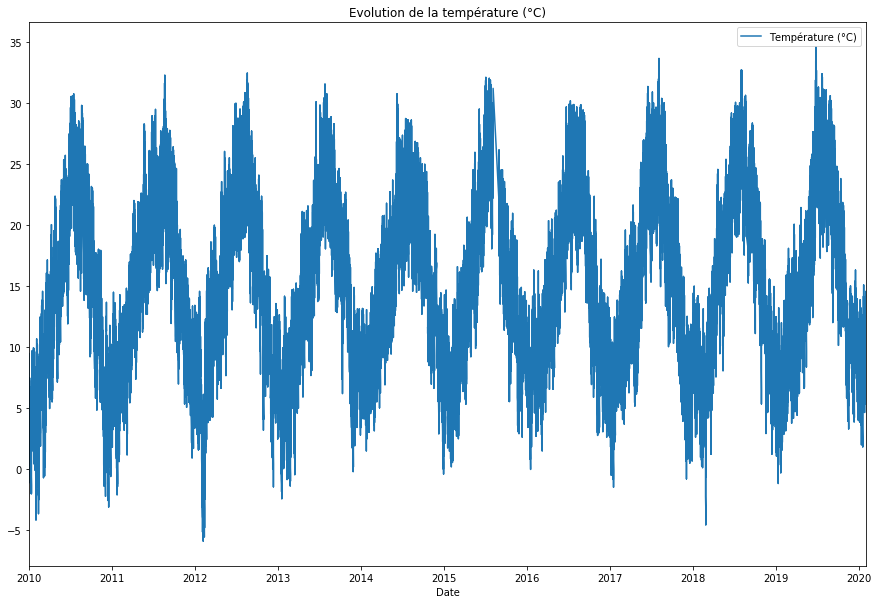

In [249]:
# representation part
# we differenciate the current year with incomplete data
current_year = datetime.now()
# temperature evolution since 2010
# gca = get current axis
ax = plt.gca()

data_meteo[['Date', 'Température (°C)']].plot(
    x='Date', label='Température', title="Evolution de la température (°C)", figsize=(15, 10), ax=ax
)

temperatures_stats = data_meteo[['Annee', 'Température (°C)']]
# TODO: deprecation : use agg().rename() instead
temperatures_stats = temperatures_stats.groupby(['Annee'], as_index=False).agg({'Température (°C)':
                                  {'Moyennes': np.mean, 'Minimales': np.min, 'Maximales': np.max}})

print(temperatures_stats)

temperatures_stats['Annee'] = pd.to_datetime(temperatures_stats['Annee'], format='%Y')
print(temperatures_stats)
# display the plot
temperatures_stats[:-1].plot(
    x='Annee', label='Moyennes par an', ax=ax, marker='o'
)
# specific display for the current year (incomplete data)
temperatures_stats[-2:].plot(
    x='Annee', label='Moyennes par an', ax=ax, linestyle='dashed', marker='o'
)

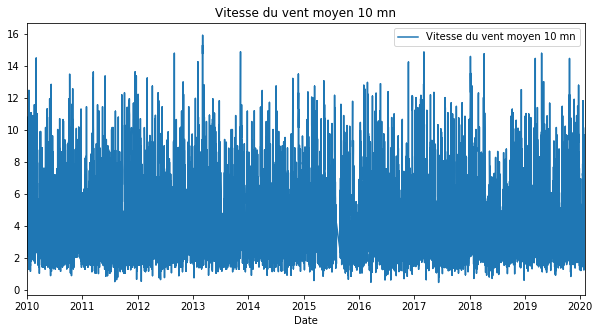

In [239]:
# wind speed during the last 10 years
data_meteo[['Date', 'Vitesse du vent moyen 10 mn']].plot(
    x='Date', label='Vitesse moyenne', title='Vitesse du vent moyen 10 mn', figsize=(10,5)
)

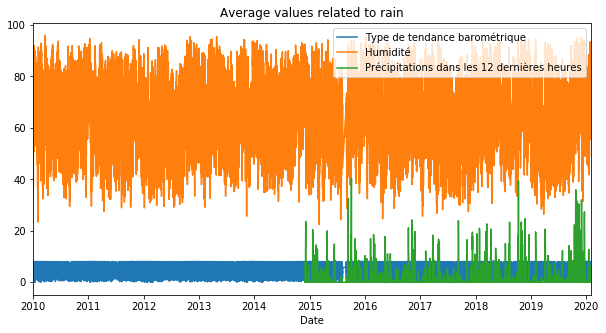

In [240]:
# Humidity/rain statistics for the last 10 years
# TODO: improve readability
data_meteo[['Date', 'Type de tendance barométrique', 'Humidité', 'Précipitations dans les 12 dernières heures']].plot(
    x='Date', label='Vitesse moyenne', title='Average values related to rain', figsize=(10,5)
)